## 可视化各个区的投放点数目和每个投放点服务的人数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")
plt.rcParams["font.sans-serif"]='KaiTi'   #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False   #解决负号无法显示的问题
%matplotlib inline

In [2]:
df_1 = pd.read_excel('./附表2：长春市9个区隔离人口数量与生活物资投放点数量.xlsx', sheet_name=0)
df_1

,区域名称,隔离人口数（万人）,生活物资投放点数量,投放点平均服务人数
0,朝阳区,57.8,94,0.614894
1,南关区,48.9,261,0.187356
2,宽城区,32.6,181,0.180110
3,绿园区,38.5,470,0.081915
4,二道区,42.6,9,4.733333
5,长春新区(高新),36.8,215,0.171163
6,经开区,20.3,37,0.548649
7,净月区,22.8,279,0.081720
8,汽开区,21.7,10,2.170000


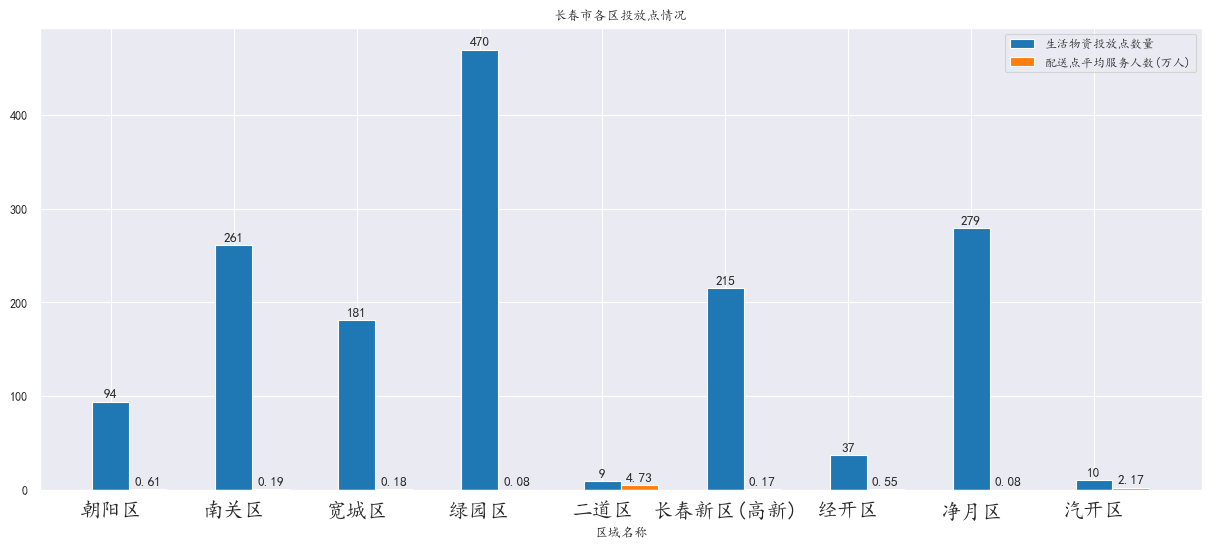

In [3]:
plt.figure(figsize=(15,6))
plt.title('长春市各区投放点情况')
xticks = np.arange(9) 
bar_width = 0.3
plt.bar(xticks, df_1['生活物资投放点数量'], width=bar_width, label='生活物资投放点数量')
for a, b in zip(xticks, df_1['生活物资投放点数量']):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.bar(xticks+bar_width, df_1['投放点平均服务人数'], bar_width, align="center", label='配送点平均服务人数(万人)')
for a, b in zip(xticks+bar_width, df_1['投放点平均服务人数']):
    plt.text(a, b + 2, "%.2f" % b, ha='center', va='bottom')
plt.xticks(xticks,df_1['区域名称'],size=15)
plt.xlabel('区域名称')
plt.legend()
plt.savefig('./images/问题2_各区投放点情况.png')
plt.show()

# 寻找平均服务人数与感染人数之间的关系  


In [4]:
sum_number = pd.read_excel('./sum_data.xlsx')
sum_number.iloc[-1, 3:]


九台区     9547
长春新区    2394
净月区     1641
绿园区     4623
朝阳区     3438
经开区     3466
双阳区       99
宽城区     8893
南关区     3567
汽开区     1116
二道区     2541
莲花山区      37
公主岭市     123
德惠市      364
榆树市     1174
农安县      156
Name: 42, dtype: object

In [8]:
location = ['朝阳区', '南关区', '宽城区', '绿园区', '二道区', '长春新区', '经开区', '净月区', '汽开区']
num_data = sum_number.iloc[-1, 3:][location]
percent = num_data.values/(df_1['隔离人口数（万人）']*10000)
df_1

,区域名称,隔离人口数（万人）,生活物资投放点数量,投放点平均服务人数
0,朝阳区,57.8,94,0.614894
1,南关区,48.9,261,0.187356
2,宽城区,32.6,181,0.180110
3,绿园区,38.5,470,0.081915
4,二道区,42.6,9,4.733333
5,长春新区(高新),36.8,215,0.171163
6,经开区,20.3,37,0.548649
7,净月区,22.8,279,0.081720
8,汽开区,21.7,10,2.170000


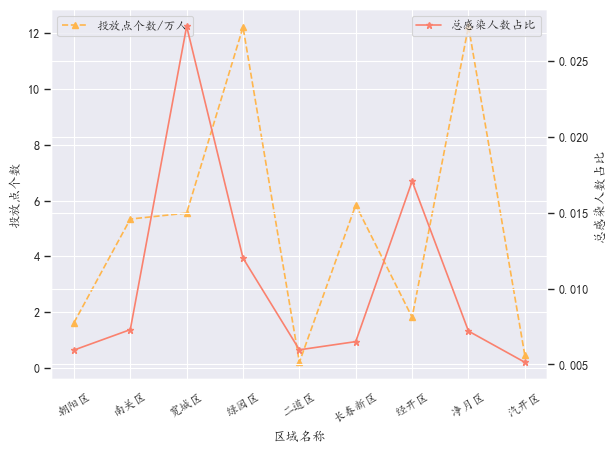

In [13]:
fig,ax = plt.subplots()
ax.plot(xticks, (df_1['生活物资投放点数量'].values/df_1['隔离人口数（万人）']), color='#FFB64D', marker='^', label='投放点个数/万人', linestyle='dashed')
ax.set_xlabel('区域名称')
ax.set_ylabel('投放点个数')
ax.set_xticks(xticks, location, rotation=30)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(xticks, percent, color='#FA816E', label='总感染人数占比', marker='*')
ax2.set_ylabel('总感染人数占比')
ax2.legend(loc='upper right')
plt.savefig('./images/问题2_感染人数与配送点个数关系图.png')

plt.show()

以经开区和净月区为研究对象，可以看出在位置大致相同人口大致相同的情况下，随着投放点个数的增加新冠感染人数占比在下降，同样的情况也出现在宽城区和绿园区的对比中